In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/Churn_Modelling[1].csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
df.duplicated().sum()

np.int64(2)

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [12]:
df.shape

(9996, 14)

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5002.497899,1.569095e+07,650.503301,38.921071,5.013305,76476.263216,1.530212,0.705482,0.514906,100106.701248,0.203782
std,2885.744618,7.192840e+04,96.624668,10.488421,2.892353,62397.118820,0.581684,0.455849,0.499803,57513.314398,0.402829
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2503.750000,1.562855e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5002.500000,1.569074e+07,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100238.110000,0.000000
75%,7501.250000,1.575323e+07,717.250000,44.000000,7.250000,127639.372500,2.000000,1.000000,1.000000,149400.107500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9996 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9996 non-null   int64  
 1   CustomerId       9996 non-null   int64  
 2   Surname          9996 non-null   object 
 3   CreditScore      9996 non-null   int64  
 4   Geography        9996 non-null   object 
 5   Gender           9996 non-null   object 
 6   Age              9996 non-null   float64
 7   Tenure           9996 non-null   int64  
 8   Balance          9996 non-null   float64
 9   NumOfProducts    9996 non-null   int64  
 10  HasCrCard        9996 non-null   float64
 11  IsActiveMember   9996 non-null   float64
 12  EstimatedSalary  9996 non-null   float64
 13  Exited           9996 non-null   int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


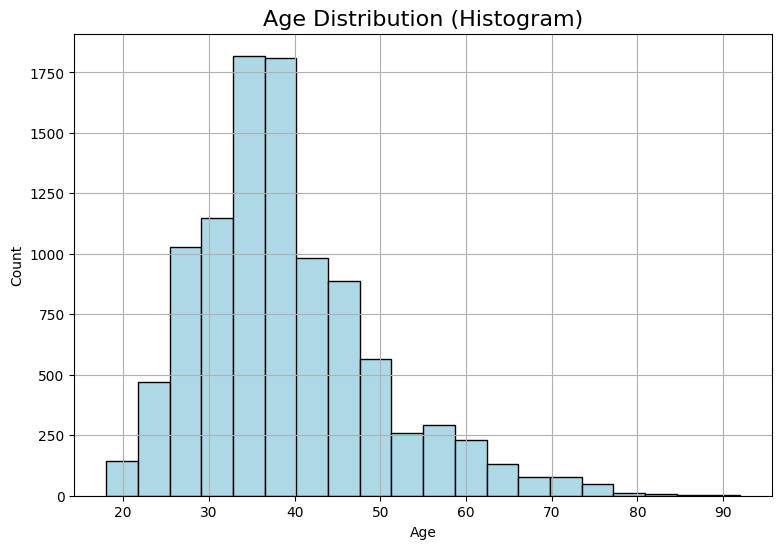

In [16]:
plt.figure(figsize=(9,6))
plt.hist(df['Age'].dropna(), bins=20, color='lightblue', edgecolor='black')
plt.grid(True)
plt.title('Age Distribution (Histogram)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

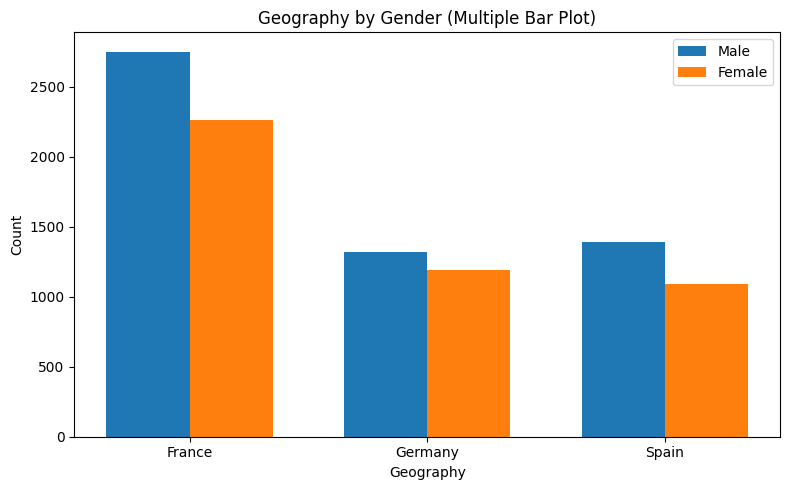

In [17]:
geo_gender = df.groupby(['Geography', 'Gender']).size().unstack()

# Plot settings
plt.figure(figsize=(8,5))
x = range(len(geo_gender.index))
bar_width = 0.35

plt.bar([pos - bar_width/2 for pos in x], geo_gender['Male'],
        width=bar_width, label='Male')
plt.bar([pos + bar_width/2 for pos in x], geo_gender['Female'],
        width=bar_width, label='Female')

plt.xticks(x, geo_gender.index)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography by Gender (Multiple Bar Plot)')
plt.legend()
plt.tight_layout()
plt.show()

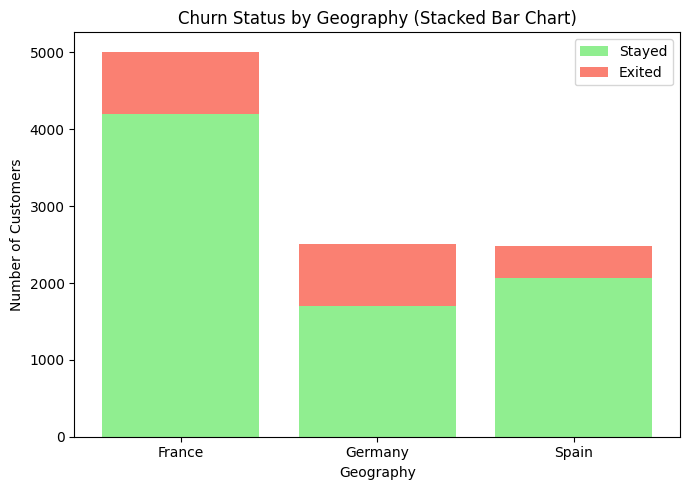

In [18]:
geo_exit = df.groupby(['Geography', 'Exited']).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(7,5))
plt.bar(geo_exit.index, geo_exit[0], label='Stayed', color='lightgreen')
plt.bar(geo_exit.index, geo_exit[1], bottom=geo_exit[0], label='Exited', color='salmon')

plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title('Churn Status by Geography (Stacked Bar Chart)')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [21]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


In [23]:
X =df.drop("Exited",axis=1)
Y = df[["Exited"]]

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42.0,2,0.00,1,1.0,1.0,101348.88,1,False,False,False
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,True,False
2,502,42.0,8,159660.80,3,1.0,0.0,113931.57,1,False,False,False
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,False,False,False
5,645,44.0,8,113755.78,2,1.0,0.0,149756.71,1,False,True,True


In [27]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train.values.ravel())
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
# Show first TEN Predictions vs Actual values
print("Predicted values:", y_pred[:10])
print("Actual values:   ", y_test[:10].values)

Predicted values: [0 0 0 0 0 0 0 0 0 0]
Actual values:    [[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


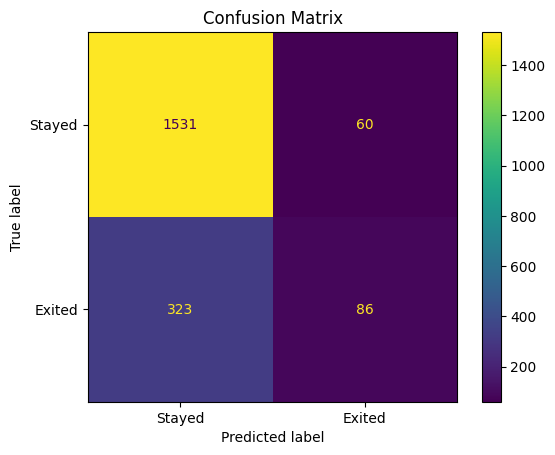

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.83      0.96      0.89      1591
      Exited       0.59      0.21      0.31       409

    accuracy                           0.81      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Exited"])
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Stayed", "Exited"]))

In [40]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Accuracy
accuracy = clf.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Accuracy: 0.86


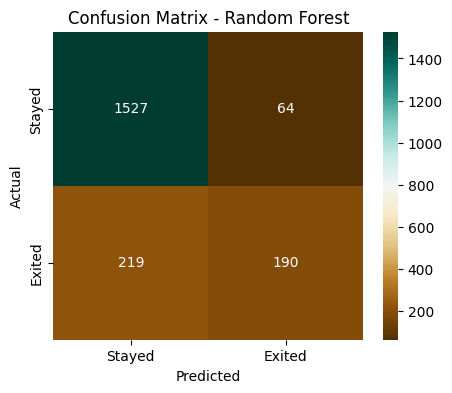

In [44]:
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BrBG',
            xticklabels=['Stayed', 'Exited'],
            yticklabels=['Stayed', 'Exited'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()